In [1]:
import tensorflow as tf

In [4]:
from tensorflow import keras

In [5]:
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten

In [6]:
from keras.layers import Conv2D

In [7]:
train_ds=keras.utils.image_dataset_from_directory(
    directory=r"E:\Ineuron-DS Course\CNN\Dog_vs_Cat\dogs_vs_cats\train",
    batch_size=32,
    image_size=(256,256),
    labels='inferred',
    label_mode='int'
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory=r"E:\Ineuron-DS Course\CNN\Dog_vs_Cat\dogs_vs_cats\test",
    batch_size=32,
    image_size=(256,256),
    labels='inferred',
    label_mode='int'
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image,label):
    tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [9]:
model=Sequential()

In [10]:
#First Convolution Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Second Convolution Layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Third Convolution Layer
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Convert to 1D array
model.add(Flatten())

#Adding 1st hidden layer with 128 neurons and relu activation
model.add(Dense(128,activation='relu'))

#Adding 2nd hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))

#Here we have one output sinnce it is binary classification
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 1582s 3s/step - loss: 2.4617 - accuracy: 0.5486 - val_loss: 0.6759 - val_accuracy: 0.5704
Epoch 2/2
625/625 [==============================] - 1100s 2s/step - loss: 0.6771 - accuracy: 0.5785 - val_loss: 0.6899 - val_accuracy: 0.5820


In [13]:
import matplotlib.pyplot as plt

In [14]:
dog_image=plt.imread(r'E:\Ineuron-DS Course\CNN\Dog_vs_Cat\dogs_vs_cats\Single_prediction\dog.7328.jpg')

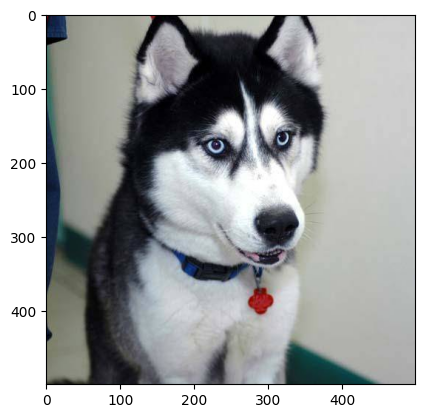

In [15]:
plt.imshow(dog_image)

In [16]:
cat_image=plt.imread(r'E:\Ineuron-DS Course\CNN\Dog_vs_Cat\dogs_vs_cats\Single_prediction\cat.2.jpg')

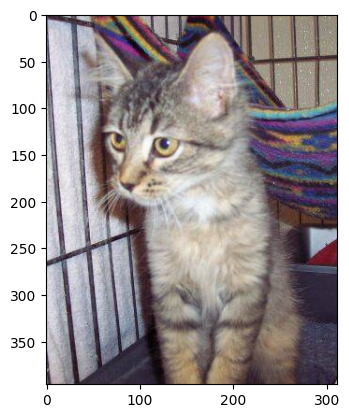

In [17]:
plt.imshow(cat_image)

In [18]:
dog_image.shape

(500, 499, 3)

In [19]:
cat_image.shape

(396, 312, 3)

In [20]:
import cv2
dog_resized=cv2.resize(dog_image,(256,256))
cat_resized=cv2.resize(cat_image,(256,256))

In [21]:
dog_resized.shape

(256, 256, 3)

In [22]:
cat_resized.shape

(256, 256, 3)

In [24]:
dog_resize=dog_resized.reshape((1,256,256,3))

In [25]:
dog_resize.shape

(1, 256, 256, 3)

In [26]:
cat_resize=cat_resized.reshape((1,256,256,3))

In [27]:
cat_resize.shape

(1, 256, 256, 3)

In [30]:
pred=model.predict(dog_resize)

1/1 [==============================] - 0s 65ms/step


In [29]:
model.predict(cat_resize)

1/1 [==============================] - 0s 40ms/step


array([[1.]], dtype=float32)

In [31]:
if pred==0:
    print('this is a image of cat')
else:
    print('this is a image of dog')

this is a image of dog
